In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import locale as loс

# Билет 1

# Задание 3

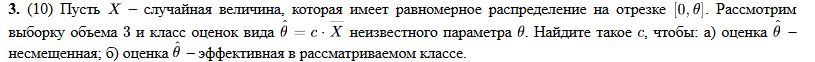

In [4]:
import numpy as np

def estimate_theta(samples, c=2):
    """Функция для оценки параметра theta по выборке."""
    return c * np.mean(samples)

# Задаём истинное значение theta и размер выборки
true_theta = 10
sample_size = 3

# Генерируем выборку из равномерного распределения
samples = np.random.uniform(0, true_theta, sample_size)

# Оцениваем theta
estimated_theta = estimate_theta(samples)

# Выводим выборку и оценку theta
print("Выборка:", samples)
print("Оценка theta:", estimated_theta)


Выборка: [0.71417093 6.70183079 7.63612683]
Оценка theta: 10.03475236529038


# Задание 4

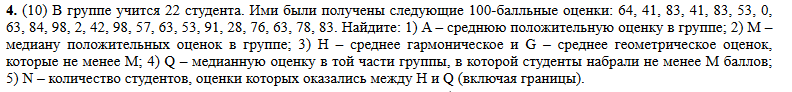

In [6]:
# Оценки студентов
grades = np.array([64, 41, 83, 41, 83, 53, 0, 63, 84, 98, 2, 42, 98, 57, 63, 53, 91, 28, 76, 63, 78, 83])

# 1) Средняя положительная оценка в группе
positive_grades = grades[grades > 50]
A = np.mean(positive_grades)

# 2) Медиана положительных оценок в группе
M = np.median(positive_grades)

# 3) Среднее гармоническое и среднее геометрическое оценок, которые не менее M
grades_ge_M = positive_grades[positive_grades >= M]
H = stats.hmean(grades_ge_M)
G = stats.gmean(grades_ge_M)

# 4) Медианная оценка в той части группы, где студенты набрали не менее M баллов
Q = np.median(grades_ge_M)

# 5) Количество студентов, оценки которых между H и Q (включая границы)
N = np.sum((grades_ge_M >= H) & (grades_ge_M <= Q))

A, M, H, G, Q, N

(74.375, 77.0, 86.70486342438375, 86.9736534686555, 83.5, 0)

# Задание 5
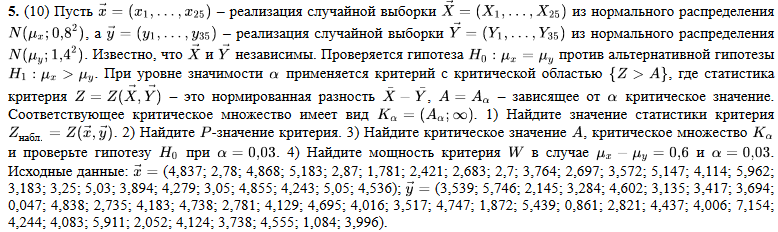

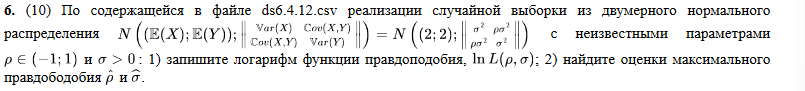

# Билет 2

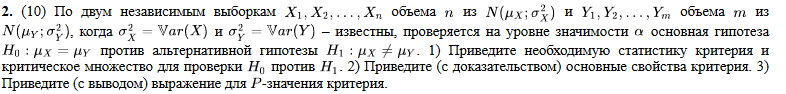

In [11]:
# Функция для вычисления Z-статистики
def calculate_z_statistic(x_mean, y_mean, sigma_x_sq, sigma_y_sq, n, m):
    return (x_mean - y_mean) / ((sigma_x_sq/n + sigma_y_sq/m) ** 0.5)

# Функция для вычисления P-значения
def calculate_p_value(z_statistic):
    return 2 * (1 - stats.norm.cdf(abs(z_statistic)))

# Пример значений (эти значения должны быть вашими реальными данными)
x_mean = 70  # среднее выборки X
y_mean = 72  # среднее выборки Y
sigma_x_sq = 15  # известная дисперсия X
sigma_y_sq = 20  # известная дисперсия Y
n = 30  # размер выборки X
m = 40  # размер выборки Y
alpha = 0.05  # уровень значимости

# Вычисление Z-статистики
z_statistic = calculate_z_statistic(x_mean, y_mean, sigma_x_sq, sigma_y_sq, n, m)

# Вычисление P-значения
p_value = calculate_p_value(z_statistic)

z_statistic, p_value


(-2.0, 0.04550026389635842)

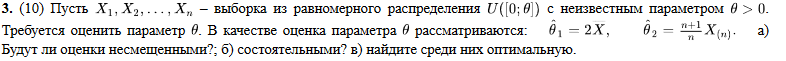

In [12]:
# Функция для генерации выборки
def generate_sample(theta, n):
    return stats.uniform.rvs(scale=theta, size=n)

# Функция для оценки theta_1
def estimate_theta_1(sample):
    return 2 * np.mean(sample)

# Функция для оценки theta_2
def estimate_theta_2(sample):
    n = len(sample)
    return (n + 1)/n * np.max(sample)

# Функция для проверки несмещенности
def is_unbiased(estimator_func, theta, n, simulations=1000):
    estimates = [estimator_func(generate_sample(theta, n)) for _ in range(simulations)]
    mean_estimate = np.mean(estimates)
    return np.isclose(mean_estimate, theta, atol=1e-2), mean_estimate

# Функция для проверки состоятельности
def is_consistent(estimator_func, theta, simulations=1000):
    sample_sizes = np.arange(10, 1001, 10)
    estimates = [np.mean([estimator_func(generate_sample(theta, n)) for _ in range(simulations)]) for n in sample_sizes]
    return np.all(np.isclose(estimates, theta, atol=1e-2)), estimates[-1]

# Значение theta
theta = 10  # Пример значения theta

# Проверка несмещенности и состоятельности для оценки theta_1
unbiased_1, mean_estimate_1 = is_unbiased(estimate_theta_1, theta, 100)
consistent_1, consistent_estimate_1 = is_consistent(estimate_theta_1, theta)

# Проверка несмещенности и состоятельности для оценки theta_2
unbiased_2, mean_estimate_2 = is_unbiased(estimate_theta_2, theta, 100)
consistent_2, consistent_estimate_2 = is_consistent(estimate_theta_2, theta)

(unbiased_1, mean_estimate_1, consistent_1, consistent_estimate_1), (unbiased_2, mean_estimate_2, consistent_2, consistent_estimate_2)


((False, 9.975126237961415, False, 9.997471646198402),
 (True, 10.00130738766584, False, 10.000043383301657))

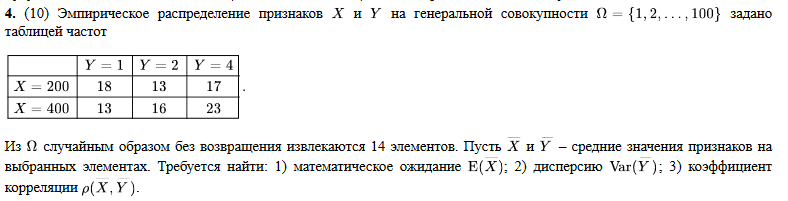
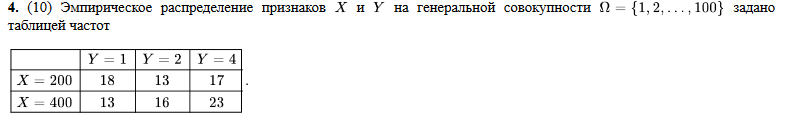

In [13]:
# Заданные значения и частоты
x_values = np.array([200, 400])
y_values = np.array([1, 2, 4])
frequencies = np.array([[18, 13], [13, 16], [17, 23]])

# Расчет математического ожидания E(X--)
total_samples = frequencies.sum()
x_probabilities = frequencies.sum(axis=0) / total_samples
E_X = np.dot(x_values, x_probabilities)

# Расчет дисперсии Var(Y--)
y_probabilities = frequencies.sum(axis=1) / total_samples
E_Y2 = np.dot(y_values**2, y_probabilities)
E_Y = np.dot(y_values, y_probabilities)
Var_Y = E_Y2 - E_Y**2

# Расчет коэффициента корреляции ρ(X--, Y--)
joint_probabilities = frequencies / total_samples
E_XY = sum(x_values[i] * y_values[j] * joint_probabilities[j, i] 
           for i in range(len(x_values)) 
           for j in range(len(y_values)))
Cov_XY = E_XY - E_X * E_Y
Std_X = np.sqrt(np.dot(x_values**2, x_probabilities) - E_X**2)
Std_Y = np.sqrt(Var_Y)
Corr_XY = Cov_XY / (Std_X * Std_Y)

E_X, Var_Y, Corr_XY

(304.0, 1.6698999999999993, 0.11647971993031793)